<a href="https://colab.research.google.com/github/addicted-ai/fastai-tests/blob/main/MNIST_digit_compact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compact code

In [1]:
# supressing warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import os

# mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 4.9 MB/s 
     |████████████████████████████████| 188 kB 10.1 MB/s 
     |████████████████████████████████| 1.2 MB 12.2 MB/s 
     |████████████████████████████████| 46 kB 3.7 MB/s 
     |████████████████████████████████| 54 kB 2.1 MB/s 
     |████████████████████████████████| 51 kB 241 kB/s 


In [4]:
from fastai.vision.all import *
from fastbook import *

In [5]:
path = untar_data(URLs.MNIST_SAMPLE)

In [7]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

three_tensors = [tensor(Image.open(o)) for o in threes]
seven_tensors = [tensor(Image.open(o)) for o in sevens]

stacked_threes = torch.stack(three_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255

train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28) # just concating 3 & 7 matrix
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1) # label 1 & 0 for classifying 3
dset = list(zip(train_x,train_y))


valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

dl = DataLoader(dset, batch_size=256)
valid_dl = DataLoader(valid_dset, batch_size=256)

In [12]:
# we are still using them!!!! lol ok
def mnist_loss(predictions, targets):
 predictions = predictions.sigmoid()
 return torch.where(targets==1, 1-predictions, predictions).mean()

def batch_accuracy(xb, yb):
 preds = xb.sigmoid()
 correct = (preds>0.5) == yb
 return correct.float().mean()

In [15]:
dls = DataLoaders(dl, valid_dl)
simple_net = nn.Sequential(
 nn.Linear(28*28,30),
 nn.ReLU(),
 nn.Linear(30,1)
)

learn = Learner(dls, simple_net, opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)
learn.fit(20, lr=0.5)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.191025,0.479151,0.504416,00:00
1,0.089235,0.229439,0.786065,00:00
2,0.045523,0.117231,0.898921,00:00
3,0.029090,0.079777,0.926398,00:00
4,0.021812,0.062228,0.943081,00:00
5,0.018113,0.051937,0.952404,00:00
6,0.016073,0.045380,0.959274,00:00
7,0.014787,0.040990,0.963199,00:00
8,0.013859,0.037907,0.965162,00:00
9,0.013145,0.035631,0.967125,00:00


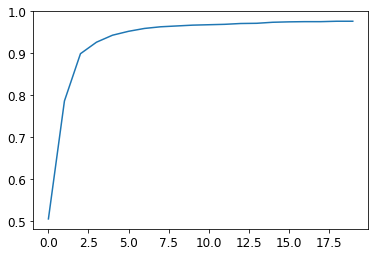

In [16]:
plt.plot(L(learn.recorder.values).itemgot(2));